In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from ML2_lib import loss
from ML2_lib import noise
from ML2_lib import algo_sgd
from ML2_lib import plot_set

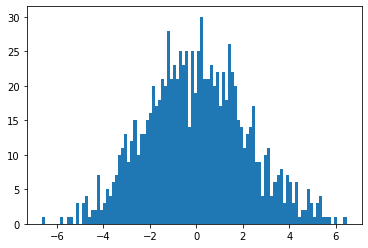

In [46]:
A = noise.Gauss(sigma=2.2,mean=0,dim=1000).generate()

plt.hist(A,bins=100)
plt.show()

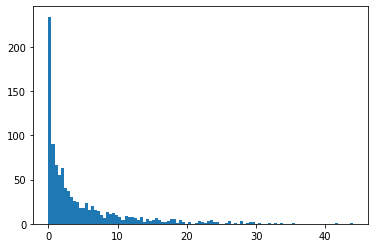

In [47]:
plt.hist(A**2,bins=100)
plt.show()

In [48]:

np.mean(A**2)

4.708440930496214

In [7]:
np.sum(A)/1000000

0.009913176237813489

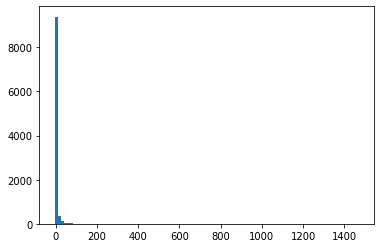

In [8]:
B = noise.LogNormal(sigma=1.75,mean=0,dim=10000).generate()
plt.hist(B,bins=100)
plt.show()

In [9]:
np.mean((np.dot((1 - 0.5) , A)) ** 2) + 0.5 * np.mean(B ** 2)

318.9099877806151

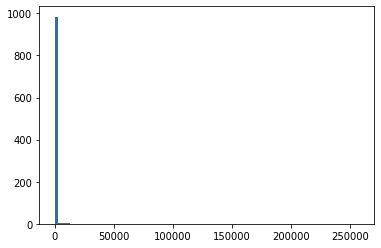

In [18]:
B = noise.LogNormal(sigma=1.75,mean=0,dim=1000).generate()
plt.hist(B**2,bins=100)
plt.show()

In [11]:

np.mean((np.dot((1 - 0) , A)) ** 2)

102.90408991906028

In [12]:
np.percentile(a=B,q=99.999)

1495.234765364897

In [13]:
np.sort(B)[-100:]


array([ 635.81548202,  636.97664096,  638.90260483,  643.60685777,
        644.59432891,  646.34825168,  653.51421776,  653.58218398,
        658.73744545,  659.13354655,  659.54625743,  660.753667  ,
        664.90287893,  665.51521823,  682.29739004,  683.20344268,
        685.81062307,  689.60813606,  707.14912485,  710.86579972,
        716.41996823,  724.7790473 ,  736.46686889,  741.32865722,
        754.542058  ,  756.21639693,  761.45206292,  762.49756464,
        762.85602662,  766.27877582,  769.84637174,  771.39224141,
        773.96017471,  779.42440979,  792.77598768,  800.15500991,
        809.59134519,  818.88178509,  820.18334838,  825.17658863,
        835.44495293,  839.53048709,  863.53419981,  872.01980262,
        886.02755719,  888.11534469,  889.40544862,  894.46042559,
        894.57809244,  903.0864917 ,  903.74845227,  915.58262322,
        916.25797758,  920.22804039,  929.24494491,  940.85799633,
        941.84482645,  988.03484551, 1001.86625724, 1010.59758

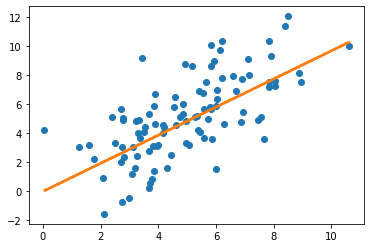

In [14]:
# データ生成デモ Gauss
X_mean = 5
X_var = 2
rng = np.random.default_rng()
X = rng.normal(loc=X_mean,size=100,scale=X_var)
Y = noise.Gauss(sigma=2.2,dim=X.shape[0],n=1).generate() + X



a = loss.LinearQuadraticLoss()

data = [X,Y]
core = algo_sgd.SGD(w_init=0,a=0.001,t_max=99,data=data)
for _ in core:
    core.update(a)



x_m = np.linspace(X.min(),X.max(),1000)
y_m = a.predict(x_m,core.w)
plt.scatter(X,Y)
plt.scatter(x_m,y_m,s=1)

plt.show()

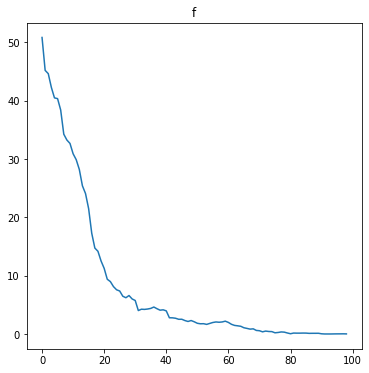

In [39]:
son = loss.LinearQuadraticLoss()
w = np.array(core.wstore).reshape(1,-1)
A = A.reshape(-1,1)
B = B.reshape(-1,1)

f_store = np.mean(0.5 * ((A + B) - np.dot(A,w)) ** 2 - (0.5 * np.mean(B ** 2)),axis=0)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(f_store)
ax.set_title('f')
plt.show()

In [44]:
f_store

array([5.08219867e+01, 4.51812854e+01, 4.46218220e+01, 4.22631914e+01,
       4.04682310e+01, 4.03402066e+01, 3.83902567e+01, 3.42420801e+01,
       3.32420942e+01, 3.26580928e+01, 3.08925649e+01, 2.98763846e+01,
       2.82029539e+01, 2.53982109e+01, 2.40670124e+01, 2.14787096e+01,
       1.72710729e+01, 1.47306476e+01, 1.41717007e+01, 1.25157252e+01,
       1.12520437e+01, 9.38229669e+00, 8.97989271e+00, 8.12116290e+00,
       7.57737689e+00, 7.36697497e+00, 6.47264598e+00, 6.21228713e+00,
       6.59287460e+00, 6.00822210e+00, 5.74125831e+00, 4.01737660e+00,
       4.24675136e+00, 4.21536998e+00, 4.27870591e+00, 4.38501970e+00,
       4.62026446e+00, 4.33379223e+00, 4.08173999e+00, 4.14214892e+00,
       3.96075131e+00, 2.77883959e+00, 2.76929319e+00, 2.69594344e+00,
       2.51831191e+00, 2.52584656e+00, 2.30203274e+00, 2.14618536e+00,
       2.30612477e+00, 2.09357696e+00, 1.83508149e+00, 1.74912211e+00,
       1.76356103e+00, 1.64664452e+00, 1.80954025e+00, 1.97093110e+00,
      

In [10]:

np.mean(noise.Gauss(mean=3,sigma=2.2,dim=10000).generate()**2)

14.01852229987539

In [20]:


w = np.array([1,2])

In [21]:
X

array([[-6.34421115,  2.06788134,  0.35067797, ..., -0.8034342 ,
         7.01212723, 12.21843567],
       [-0.357739  ,  5.47158787,  7.38138438, ...,  3.03406802,
         5.18892338, -1.62474965]])

In [22]:
np.dot(X,X.T) / 10000

array([[24.71819119,  8.85411061],
       [ 8.85411061, 25.2463279 ]])

array([1., 1.])

In [45]:
X_var = 3
X_mean = 2
X = noise.Gauss(n=10000,sigma=X_var,mean=X_mean,dim=2).generate()

w_dc = np.array([2])
w_star = np.array([0])
E_X = np.diag(np.ones(w_dc.shape[0])* (X_var**2)  + (X_mean**2))

np.dot(np.dot(E_X,w_dc),w_dc) + np.dot(np.dot(E_X,w_star),w_star) - 2 * np.dot(np.dot(E_X,w_star),w_dc)

52.0

In [46]:
E_X

array([[13.]])

In [47]:
np.dot(np.dot(E_X,w_dc),w_dc) + np.dot(np.dot(E_X,w_star),w_star) - 2 * np.dot(np.dot(E_X,w_star),w_dc)

52.0

In [48]:

np.dot(E_X,w_dc)

array([26.])

In [49]:

np.dot(X,X.T) / 10000

array([[13.25899444,  4.01761202],
       [ 4.01761202, 13.13448756]])

In [51]:

np.array([1]).shape

(1,)